In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
# Load the data
df = pd.read_csv(os.path.join('data','MBTA_2023_System-Wide_Passenger_Survey_Data.csv'))

# Data cleaning
df.isna().sum()  # Remove any rows with missing values (Only 4 rows with 'category' set to NaN)
df = df.dropna()
# df['service_mode'].unique()

# MBTA Usage by Income Level

C:\Users\astha\AppData\Local\Temp\ipykernel_2784\1401451326.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data['category'] = pd.Categorical(income_data['category'], categories=income_order, ordered=True)
C:\Users\astha\AppData\Local\Temp\ipykernel_2784\1401451326.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='service_mode', y='weighted_percent', hue='category', data=income_data, ci=None, hue_order=income_order)
C:\Users\astha\AppData\Local\Temp\ipykernel_2784\1401451326.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cleaned_labels, rotation=45, ha='right')


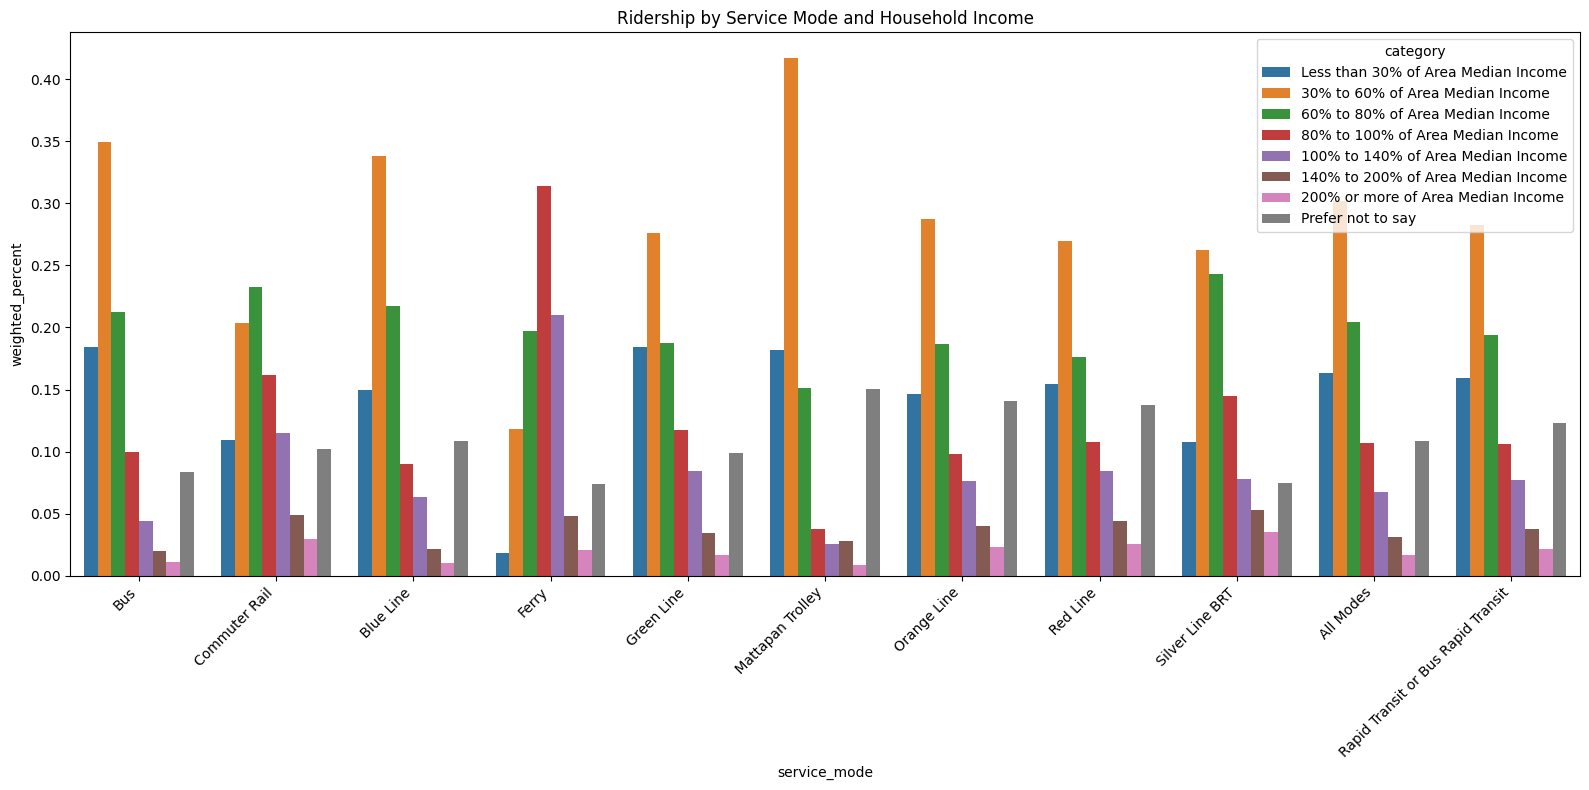

In [15]:
# # Analyze bus ridership by income level
# bus_income = df[(df['service_mode'] == 'All Modes') & (df['measure'] == 'Household Income')]
# plt.figure(figsize=(12, 6))
# sns.barplot(x='category', y='weighted_percent', data=bus_income)
# plt.title('MBTA All Modes Ridership by Household Income')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# Filter data for 'Household Income' measure
income_data = df[df['measure'] == 'Household Income']

# Define the order of income categories from lowest to highest
income_order = [
    'Less than 30% of Area Median Income',
    '30% to 60% of Area Median Income',
    '60% to 80% of Area Median Income',
    '80% to 100% of Area Median Income',
    '100% to 140% of Area Median Income',
    '140% to 200% of Area Median Income',
    '200% or more of Area Median Income',
    'Prefer not to say'
]

# Convert category to categorical type with specified order
income_data['category'] = pd.Categorical(income_data['category'], categories=income_order, ordered=True)

# Create a figure
plt.figure(figsize=(16, 8))

# Use a barplot to show all categories in 'service_mode' and their respective income groups
# sns.barplot(x='service_mode', y='weighted_percent', hue='category', data=income_data, ci=None)
# Use a barplot with ordered categories
sns.barplot(x='service_mode', y='weighted_percent', hue='category', data=income_data, ci=None, hue_order=income_order)

# Add title and adjust layout
plt.title('Ridership by Service Mode and Household Income')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# # Show the plot
# plt.show()
# Get current axis
ax = plt.gca()

# Get current x-tick labels
labels = [item.get_text() for item in ax.get_xticklabels()]

# Clean up labels by removing "Rapid Transit or Bus Rapid Transit" part if present
cleaned_labels = [label.replace('Rapid Transit or Bus Rapid Transit -', '').replace(' or Bus -', '') for label in labels]

# Set the new labels
ax.set_xticklabels(cleaned_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Based on the above graph, majority of the MBTA riders seems to be in the lower income range (upto 60% of Area Median Income)

# Race and Ethnicity

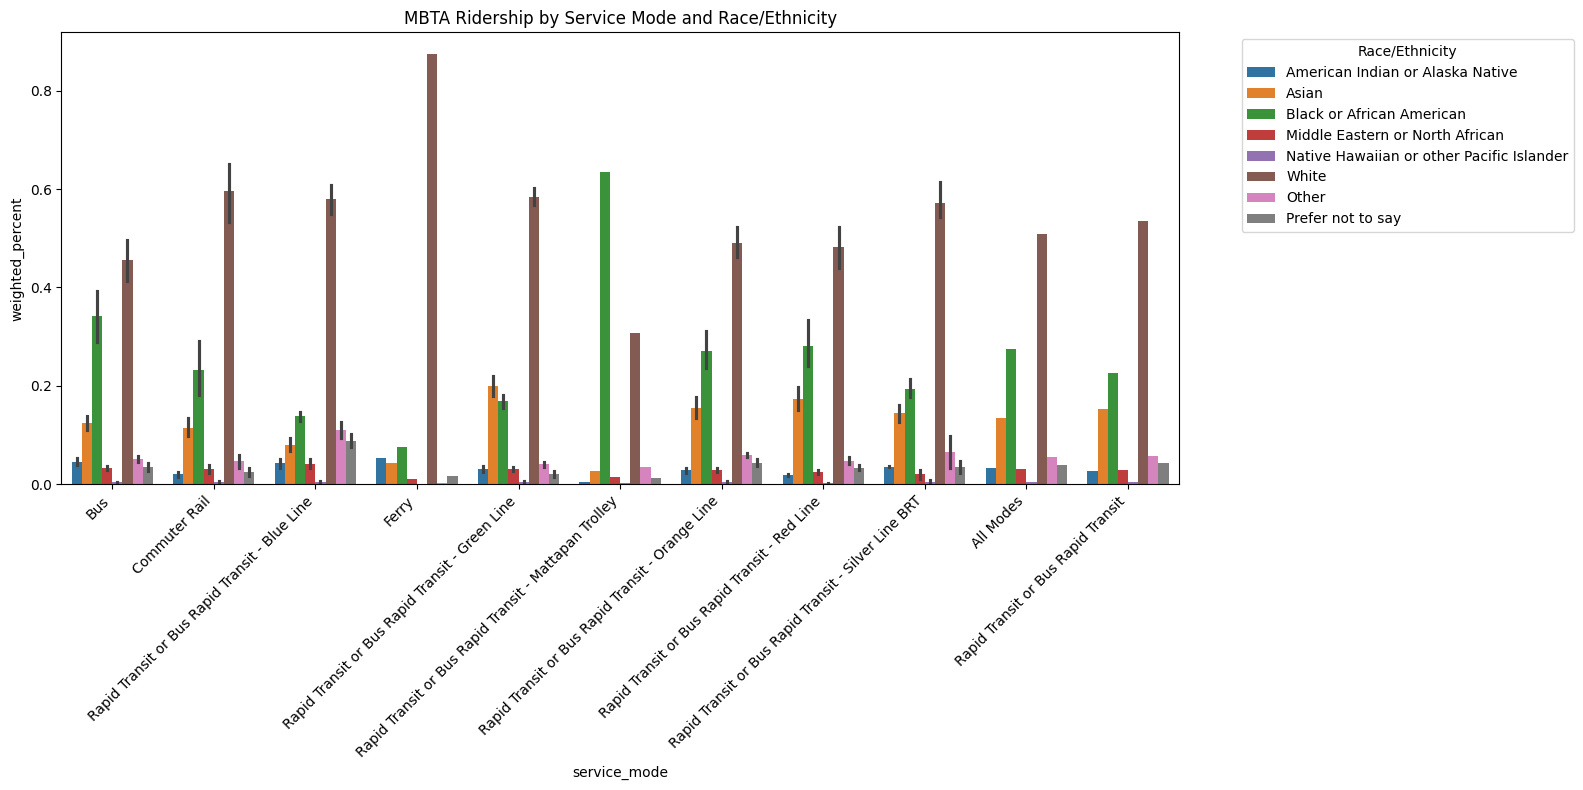

In [34]:
# Analyze bus ridership by race
# bus_income = df[df['measure'] == 'Race']
# plt.figure(figsize=(12, 6))
# sns.barplot(x='category', y='weighted_percent', data=bus_income)
# plt.title('MBTA All Modes Ridership by Race and Ethnicity')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# Filter data for 'Race' measure
race_data = df[df['measure'] == 'Race']

# Create a figure with appropriate size
plt.figure(figsize=(16, 8))

# Create barplot showing race distribution across all service modes
sns.barplot(x='service_mode', y='weighted_percent', hue='category', data=race_data)

# Add title and adjust layout
plt.title('MBTA Ridership by Service Mode and Race/Ethnicity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Age

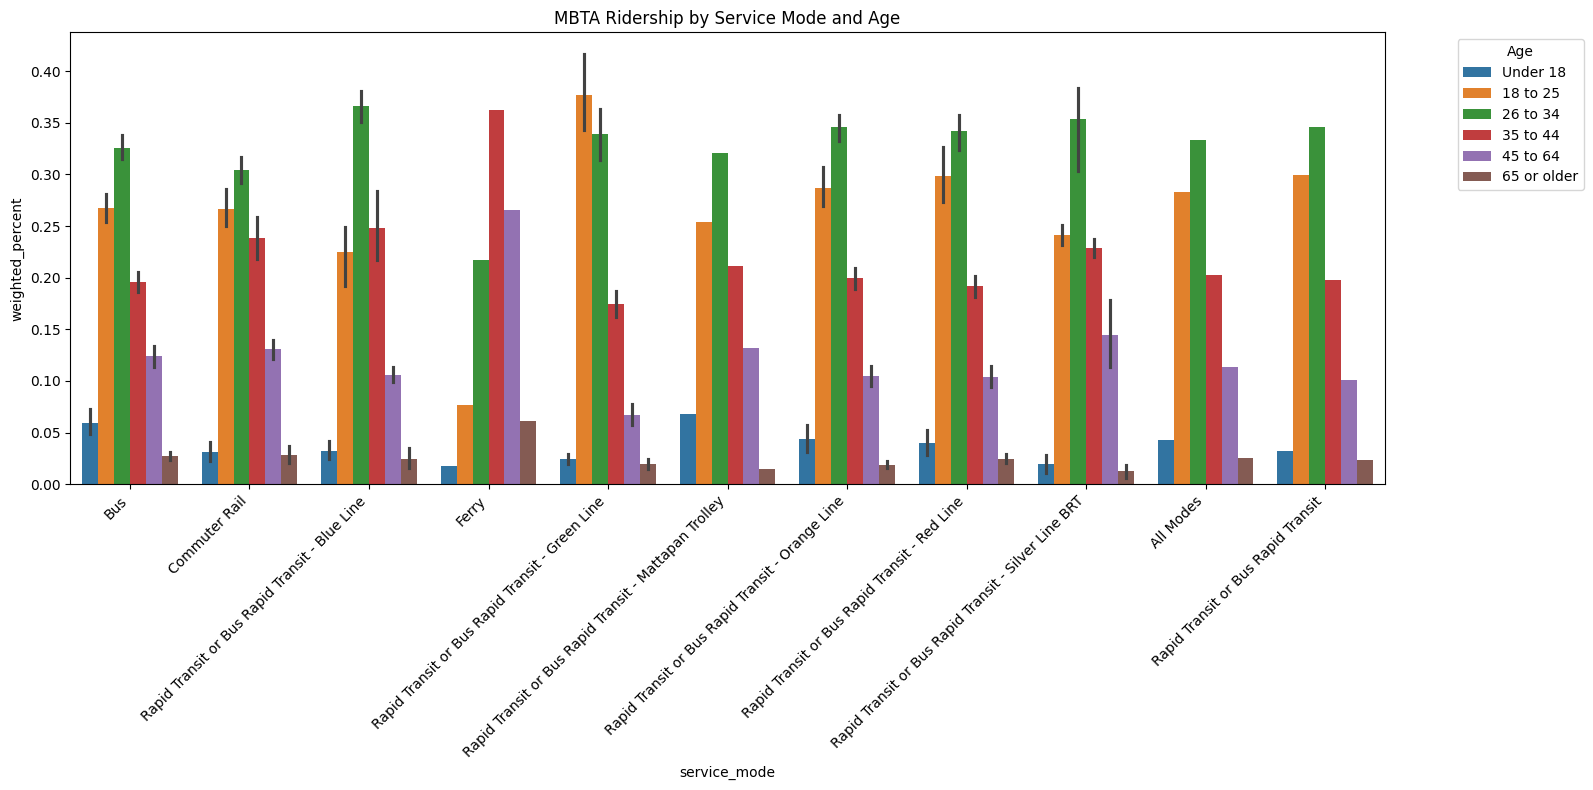

In [37]:
# Analyze bus ridership by age
# bus_income = df[df['measure'] == 'Age']
# plt.figure(figsize=(12, 6))
# sns.barplot(x='category', y='weighted_percent', data=bus_income)
# plt.title('MBTA All Modes Ridership by Age')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# Filter data for 'Race' measure
race_data = df[df['measure'] == 'Age']

# Create a figure with appropriate size
plt.figure(figsize=(16, 8))

# Create barplot showing race distribution across all service modes
sns.barplot(x='service_mode', y='weighted_percent', hue='category', data=race_data)

# Add title and adjust layout
plt.title('MBTA Ridership by Service Mode and Age')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

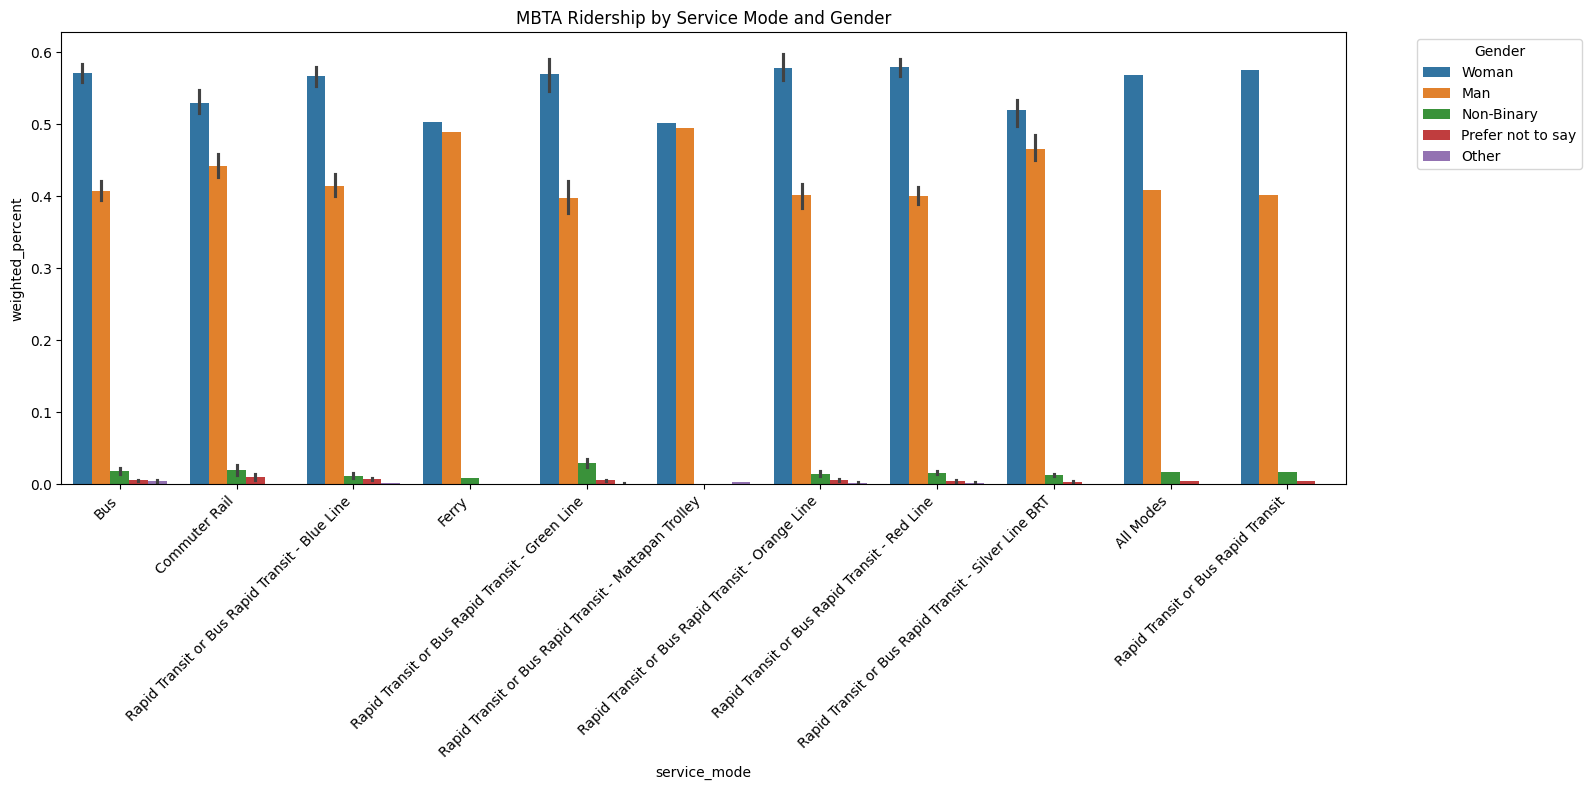

In [38]:
# Analyze bus ridership by gender
# bus_income = df[df['measure'] == 'Gender']
# plt.figure(figsize=(12, 6))
# sns.barplot(x='category', y='weighted_percent', data=bus_income)
# plt.title('MBTA All Modes Ridership by Gender')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# Filter data for 'Gender' measure
race_data = df[df['measure'] == 'Gender']

# Create a figure with appropriate size
plt.figure(figsize=(16, 8))

# Create barplot showing race distribution across all service modes
sns.barplot(x='service_mode', y='weighted_percent', hue='category', data=race_data)

# Add title and adjust layout
plt.title('MBTA Ridership by Service Mode and Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the above we can see that the majority of people who use the MBTA are regular commuters between the ages of 18-44, and that a higher percentage of women use the MBTA compared to Men

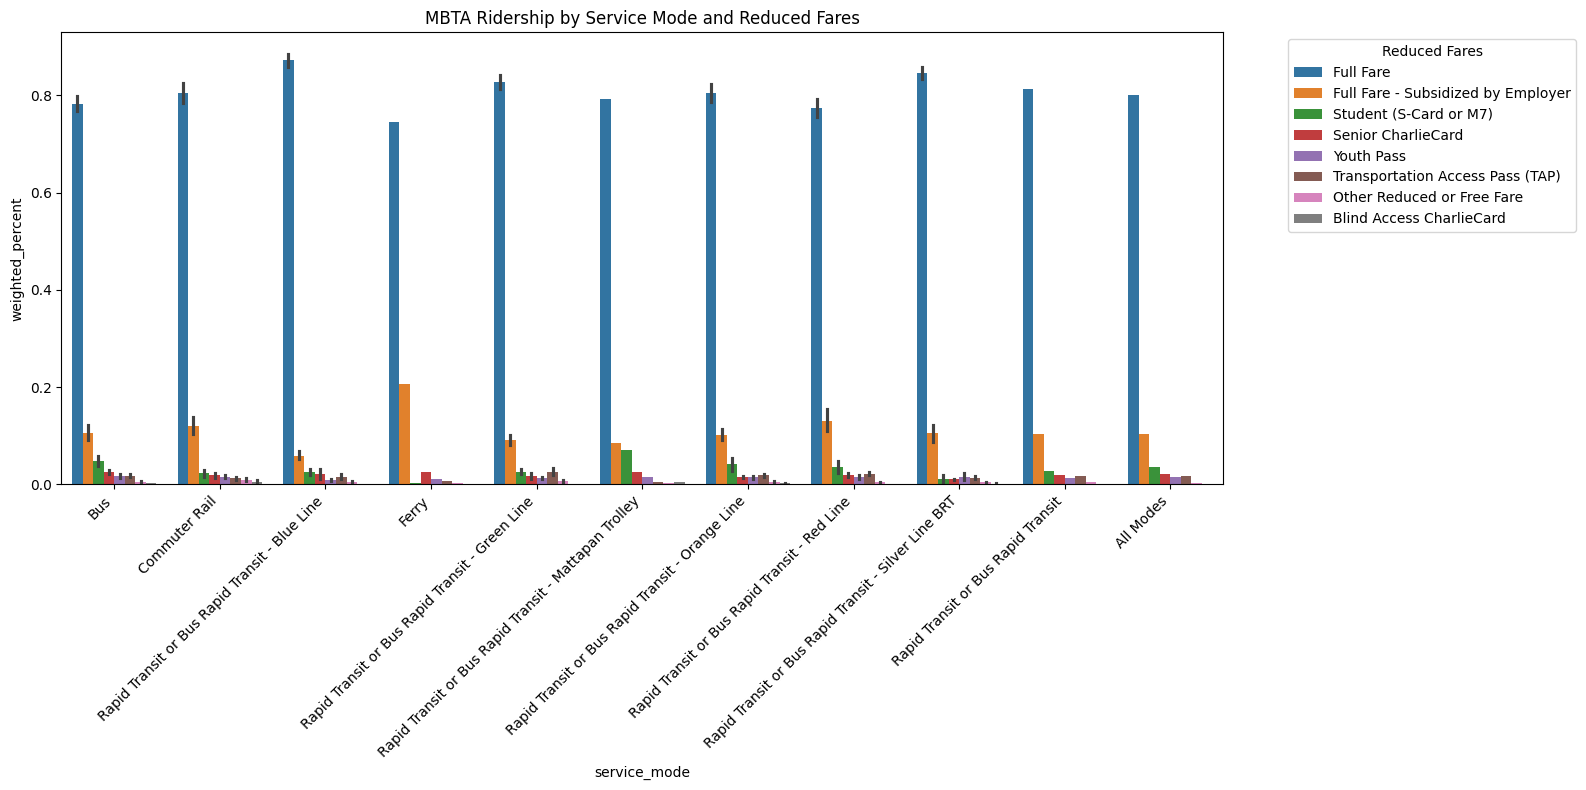

In [39]:
# Analyze reduced fare usage across different bus routes
# reduced_fares = df[(df['service_mode'] == 'Bus') & (df['measure'] == 'Reduced Fares')]
# plt.figure(figsize=(12, 6))
# sns.barplot(x='category', y='weighted_percent', data=reduced_fares)
# plt.title('Usage of Reduced Fare Options on Bus Routes')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# Filter data for Reduced Fares measure
race_data = df[df['measure'] == 'Reduced Fares']

# Create a figure with appropriate size
plt.figure(figsize=(16, 8))

# Create barplot showing race distribution across all service modes
sns.barplot(x='service_mode', y='weighted_percent', hue='category', data=race_data)

# Add title and adjust layout
plt.title('MBTA Ridership by Service Mode and Reduced Fares')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Reduced Fares', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Seems like most people pay the full fare for the MBTA, though around 10% use subsidized fares from their employers

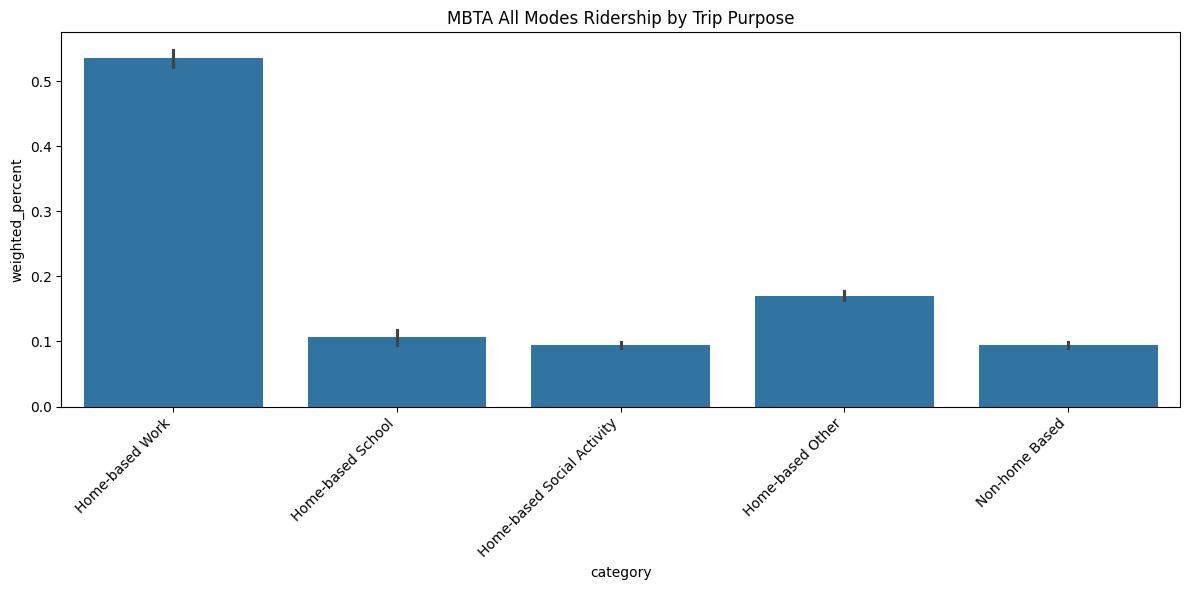

In [26]:
# Analyze bus ridership by trip purpose
bus_income = df[df['measure'] == 'Trip Purpose']
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='weighted_percent', data=bus_income)
plt.title('MBTA All Modes Ridership by Trip Purpose')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

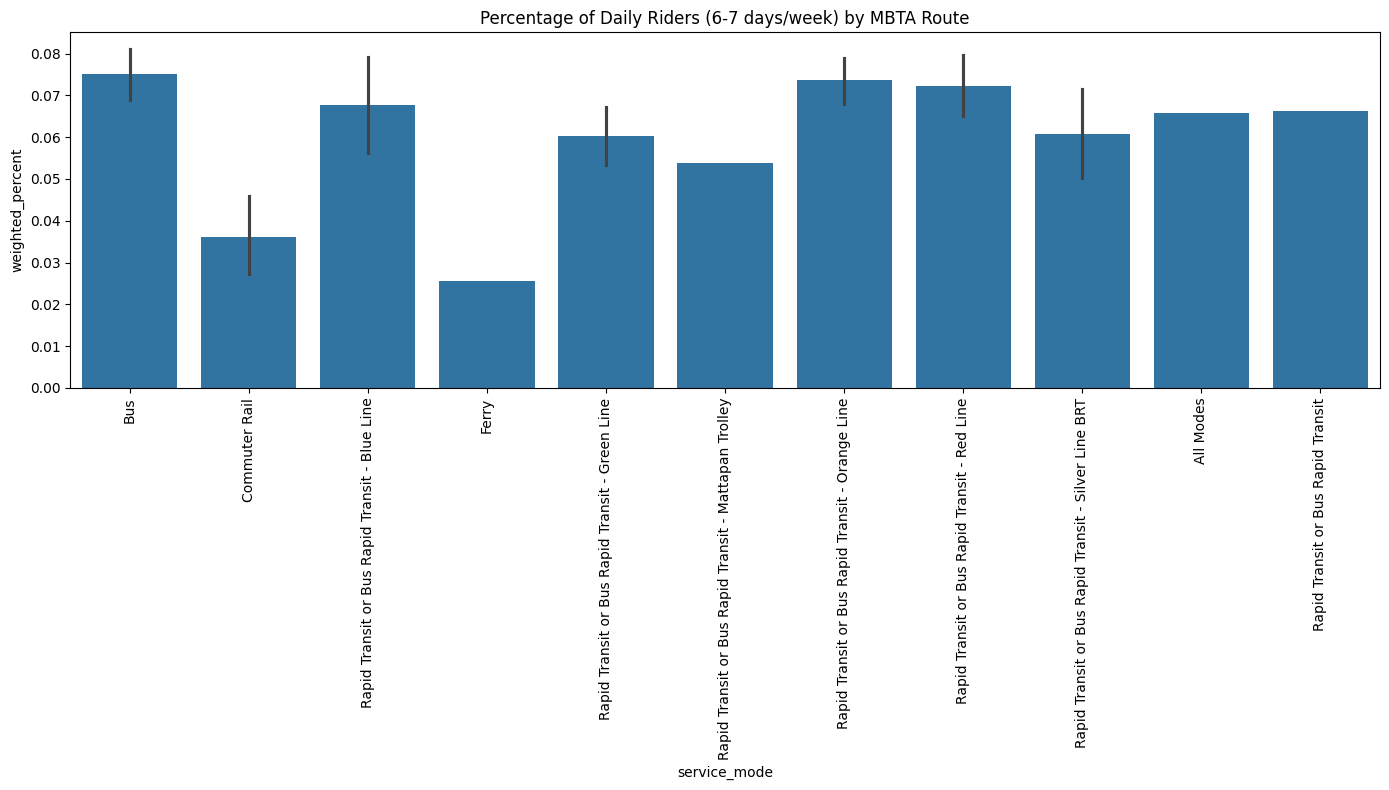

In [24]:
# Compare ridership characteristics across bus routes
route_comparison = df[(df['measure'] == 'Frequency') & 
                      (df['category'] == '6 to 7 days per week')]
plt.figure(figsize=(14, 8))
sns.barplot(x='service_mode', y='weighted_percent', data=route_comparison)
plt.title('Percentage of Daily Riders (6-7 days/week) by MBTA Route')
plt.xticks(rotation=90)
plt.tight_layout()


## Usage by Car Owners

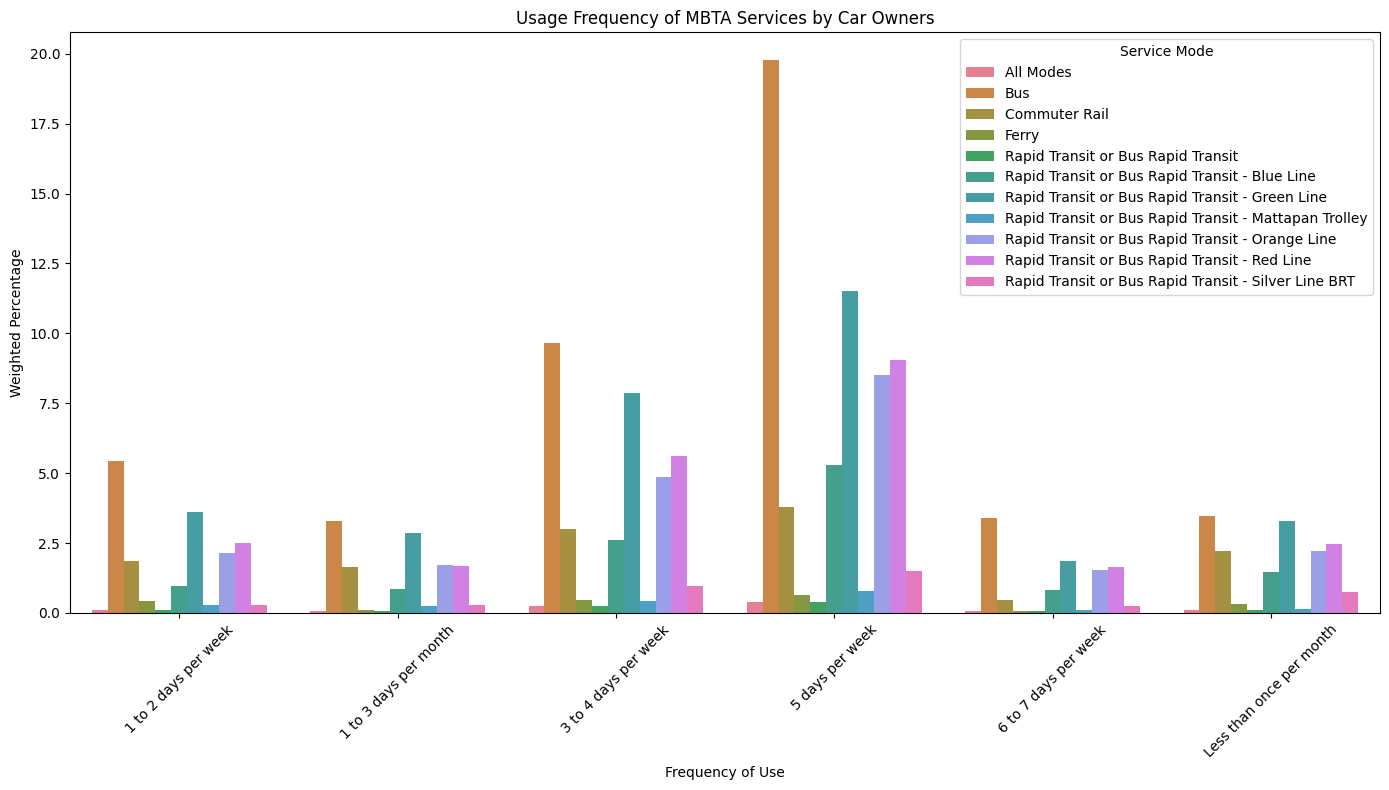

In [42]:
# First, identify people with usable cars
# Categories would include '1', '2', '3 or more'
car_owners = df[(df['measure'] == 'Usable Cars') & 
                (df['category'].isin(['1', '2', '3 or more']))]

# Get the reporting groups (representing individuals or routes) with cars
car_owner_groups = car_owners['reporting_group'].unique()

# Now find frequency data for these same reporting groups
frequency_data = df[(df['measure'] == 'Frequency') & 
                    (df['reporting_group'].isin(car_owner_groups))]

# Group by service mode and frequency category
mode_frequency = frequency_data.groupby(['service_mode', 'category'])['weighted_percent'].sum().reset_index()

# Create a visualization
plt.figure(figsize=(14, 8))
sns.barplot(x='category', y='weighted_percent', hue='service_mode', data=mode_frequency)
plt.title('Usage Frequency of MBTA Services by Car Owners')
plt.xlabel('Frequency of Use')
plt.ylabel('Weighted Percentage')
plt.xticks(rotation=45)
plt.legend(title='Service Mode')
plt.tight_layout()
plt.show()

The above graph shows that even though people have usable cars, there are still many people who use the MBTA around 5 days a week. It would be reasonable to assume this is for work. Most of these people seem to opt for the bus

In [40]:
# import pandas as pd

# # Assuming you have loaded your data into a DataFrame called df
# # df = pd.read_csv('mbta_2023_survey_data.csv')

# # List unique measures within each measure_group
# unique_measures = df.groupby('measure_group')['measure'].unique()
# print("Unique measures within each measure_group:")
# print(unique_measures)

# # List unique categories within each measure
# unique_categories = df.groupby('measure')['category'].unique()
# print("\nUnique categories within each measure:")
# print(unique_categories)